![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.layers import Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


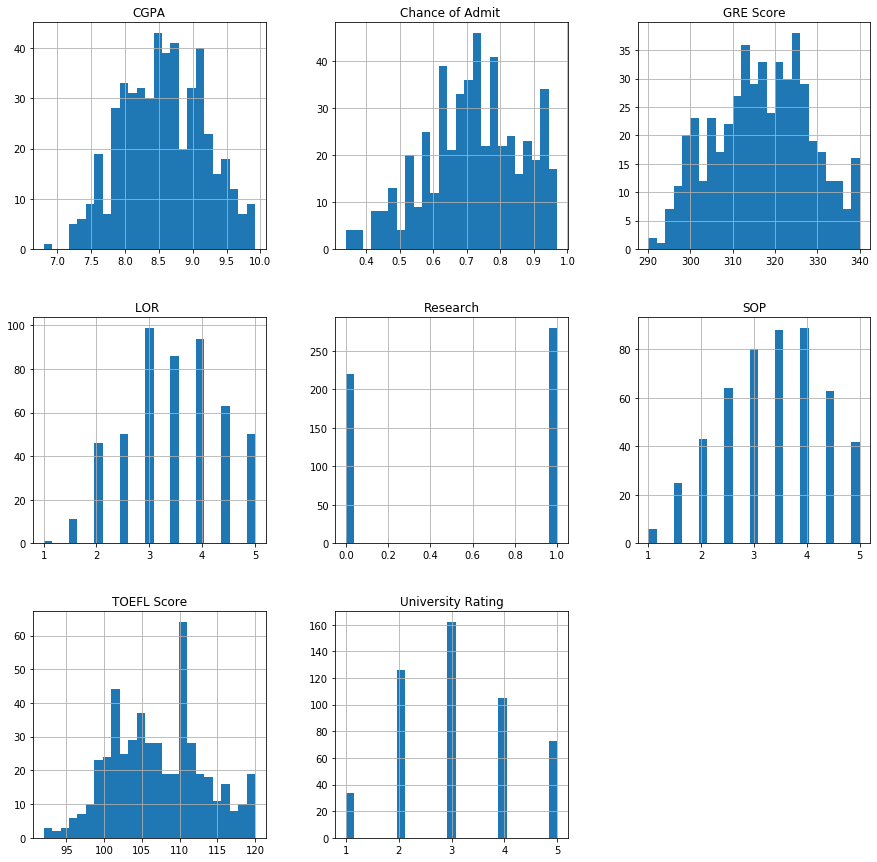

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [7]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain)

xTrain, Xval, yTrain, Yval = train_test_split(xTrain, yTrain, test_size=0.15, random_state=42)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_val = pd.DataFrame(data=scaler.transform(Xval), columns=Xval.columns, index=Xval.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)
X_val = np.array(X_val)
Y_val = np.array(Yval)

X_test = np.array(X_test)
Y_test = np.array(yTest)

In [8]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [9]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
display(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


None

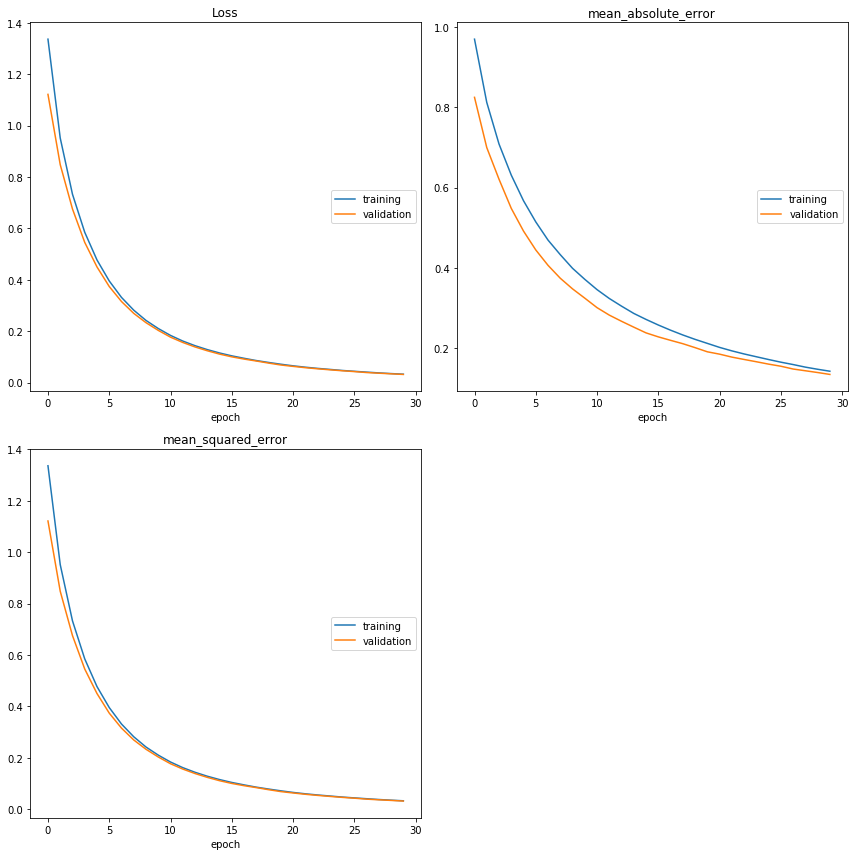

Loss
	training         	 (min:    0.033, max:    1.336, cur:    0.033)
	validation       	 (min:    0.032, max:    1.121, cur:    0.032)
mean_absolute_error
	training         	 (min:    0.143, max:    0.969, cur:    0.143)
	validation       	 (min:    0.135, max:    0.824, cur:    0.135)
mean_squared_error
	training         	 (min:    0.033, max:    1.336, cur:    0.033)
	validation       	 (min:    0.032, max:    1.121, cur:    0.032)
10/10 [==============================] - 1s 112ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - mean_absolute_error: 0.1431 - val_loss: 0.0319 - val_mean_squared_error: 0.0319 - val_mean_absolute_error: 0.1351


In [10]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

model.fit(X_train, Y_train,
          epochs=30, 
          validation_data=(X_val, Y_val),
          callbacks=[PlotLossesKeras()])

In [11]:
#Desempeño del modelo
pred = model.predict(X_test)

MSE = np.average(np.square(pred - Y_test))
print("MSE: ", np.average(np.square(pred - Y_test)))

MSE:  0.0769666733536204


### Justificacion ###
1. Para el entrenamiento de la red neuronal de una sola capa se utlizó como optimizador *Stochastic Gradiente Descentente (sgd)* NO demanda muchos recursos para el cálculo de los gradientes ya que introduciria aleatoridad para el calculo de los gradientes con lo cual la cantidad de recursos es menor.
2. Para la función de perdida se utilizó el *Error Cuadrático Medio* al tratarse de un problema de regresión.
3. Para el número de epocas o iteraciones se consideraron 30 de debibo a que se encontró que este valor el modelo se estabiliza.

Se toman estos valores dado que se considera bueno el desempeño del modelo segun la funcion de perdida. 


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [12]:
# Celda 2
K.clear_session()

# Definición red neuronal con la función Sequential()
model_2 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2.add(Dense(500, input_shape=(dims,),activation='relu'))
model_2.add(Dense(500,activation='relu'))
model_2.add(Dense(output_var))
model_2.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               4000      
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 255,001
Trainable params: 255,001
Non-trainable params: 0
_________________________________________________________________
None


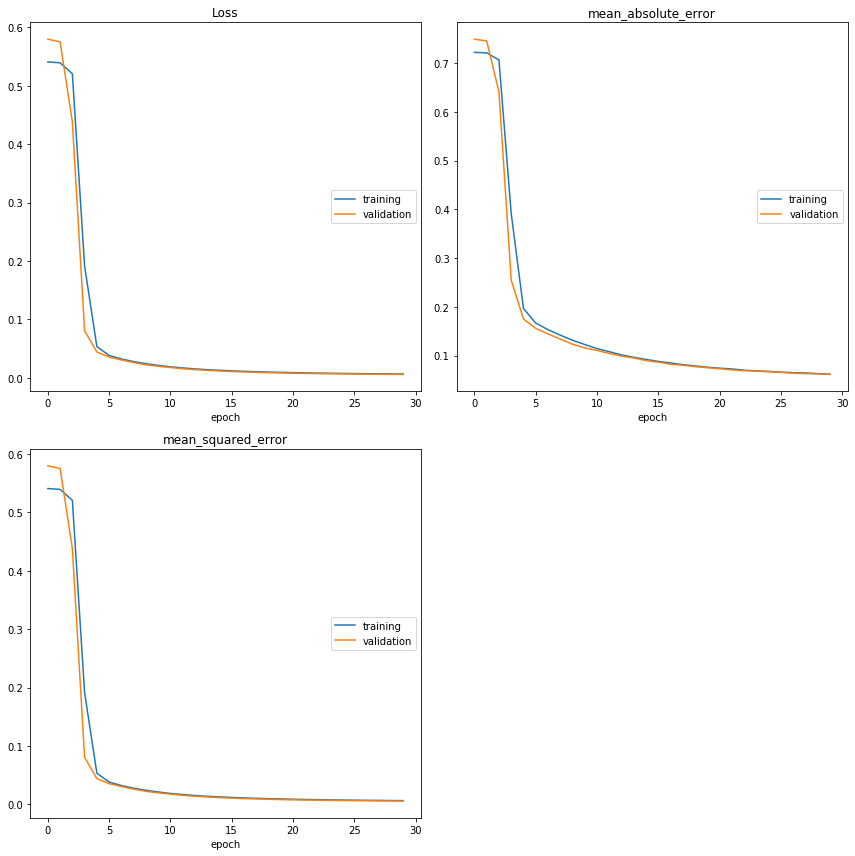

Loss
	training         	 (min:    0.006, max:    0.541, cur:    0.006)
	validation       	 (min:    0.006, max:    0.580, cur:    0.006)
mean_absolute_error
	training         	 (min:    0.062, max:    0.722, cur:    0.062)
	validation       	 (min:    0.062, max:    0.749, cur:    0.062)
mean_squared_error
	training         	 (min:    0.006, max:    0.541, cur:    0.006)
	validation       	 (min:    0.006, max:    0.580, cur:    0.006)
10/10 [==============================] - 1s 87ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0621 - val_loss: 0.0057 - val_mean_squared_error: 0.0057 - val_mean_absolute_error: 0.0615


In [13]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Entrenamiento de la red neuronal con 50 épocas
model_2.fit(X_train, Y_train,
            validation_data = (X_val, Y_val),
            epochs=30, 
            callbacks=[PlotLossesKeras()])

In [14]:
#Desempeño del modelo
pred_2 = model_2.predict(X_test)

MSE_2 = np.average(np.square(pred_2 - Y_test))
print("MSE: ", np.average(np.square(pred_2 - Y_test)))

MSE:  0.0400205630457701


### Justificacion ###
1. Para el entrenamiento de la red neuronal de una sola capa se utlizó como optimizador *Stochastic Gradiente Descentente (sgd)* NO demanda muchos recursos para el cálculo de los gradientes ya que introduciria aleatoridad para el calculo de los gradientes con lo cual la cantidad de recursos es menor.
2. Para la función de perdida se utilizó el *Error Cuadrático Medio* al tratarse de un problema de regresión.
3. Para el número de epocas o iteraciones se consideraron 30 de debibo a que se encontró que este valor el modelo se estabiliza.
4. Para la cantidad de neuronas se toamron 500, dado que al tomar menos (ejemplo 50 y 200) se obtiene un menor desempeño en el modelo y tomando mas neuronas se obliga al modelo a calibrar mas parametros y la mejora no es significativa. 

Se toman estos valores dado que se considera bueno el desempeño del modelo segun la funcion de perdida. 


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [19]:
# Celda 3
K.clear_session()

# Definición red neuronal con la función Sequential()
model_3 = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_3.add(Dense(500, input_shape=(dims,),activation='relu'))
model_3.add(Dense(500,activation='relu'))
model_3.add(Dense(output_var))
model_3.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               4000      
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 255,001
Trainable params: 255,001
Non-trainable params: 0
_________________________________________________________________
None


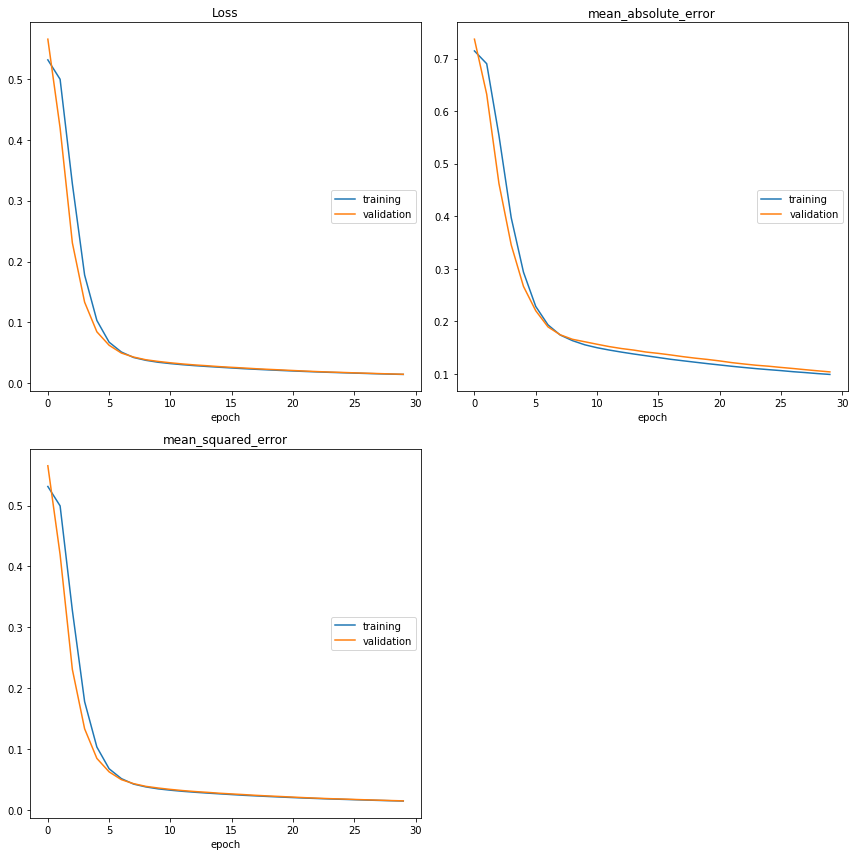

Loss
	training         	 (min:    0.015, max:    0.531, cur:    0.015)
	validation       	 (min:    0.015, max:    0.565, cur:    0.015)
mean_absolute_error
	training         	 (min:    0.099, max:    0.715, cur:    0.099)
	validation       	 (min:    0.104, max:    0.737, cur:    0.104)
mean_squared_error
	training         	 (min:    0.015, max:    0.531, cur:    0.015)
	validation       	 (min:    0.015, max:    0.565, cur:    0.015)
3/3 [==============================] - 1s 517ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - mean_absolute_error: 0.0989 - val_loss: 0.0148 - val_mean_squared_error: 0.0148 - val_mean_absolute_error: 0.1038


In [20]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2) 

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model1.h5'
best_model = ModelCheckpoint(fBestModel, save_best_only=True)

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_3.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Entrenamiento de la red neuronal con 50 épocas
model_3.fit(X_train, Y_train,
            epochs=30, 
            batch_size=128,
            validation_data = (X_val, Y_val), 
            callbacks=[best_model, early_stop, PlotLossesKeras()])

In [21]:
#Desempeño del modelo
pred_3 = model_3.predict(X_test)

MSE_3 = np.average(np.square(pred_3 - Y_test))
print("MSE: ", np.average(np.square(pred_3 - Y_test)))

MSE:  0.0447307279642005


### Justificacion ###
1. Para el entrenamiento de la red neuronal de una sola capa se utlizó como optimizador *Stochastic Gradiente Descentente (sgd)* NO demanda muchos recursos para el cálculo de los gradientes ya que introduciria aleatoridad para el calculo de los gradientes con lo cual la cantidad de recursos es menor.
2. Para la función de perdida se utilizó el *Error Cuadrático Medio* al tratarse de un problema de regresión.
3. Para el número de epocas o iteraciones se consideraron 30 de debibo a que se encontró que este valor el modelo se estabiliza.
4. Para la cantidad de neuronas se toamron 500, dado que al tomar menos (ejemplo 50 y 200) se obtiene un menor desempeño en el modelo y tomando mas neuronas se obliga al modelo a calibrar mas parametros y la mejora no es significativa. 

Se toman estos valores dado que se considera bueno el desempeño del modelo segun la funcion de perdida. 


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

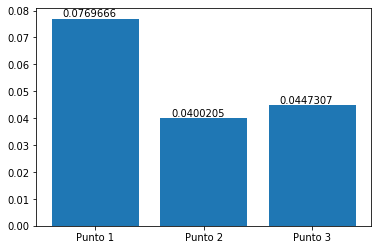

In [22]:
# Celda 4
MSEPlot = [MSE, MSE_2, MSE_3]

XLabels = ['Punto 1' , 'Punto 2', 'Punto 3']
y_pos = np.arange(len(XLabels))
plt.bar(y_pos, MSEPlot)
plt.xticks(y_pos,XLabels)

for i, v in enumerate(MSEPlot):
    plt.text(y_pos[i]-0.3,v, str(v)[0:9], verticalalignment="bottom")

plt.show()

Segun la metrica de desempeño de los 3 modelos entrenados, error cuadrático medio, evaluado en la muestra de test, se observa que el mejor modelo que se ajusta a los datos corresponde a la red neuronal de 2 capas con 500 neuronas cada una. 
Se observa en todos los modelos, que el MSE aumenta en el test vs la muestra de validacion con la que se entrena el modelo, sin embargo el MSE y perdida son menores en la muestra de validacion vs la de entrenamiento, lo que nos indica que los modelos no estan haciendo sobreajuste. 
El mejor modelo tiene como ventaja que es capaz de extarer mayor informacion sobre los datos, sin hacer sobreajuste como se ve en la metricas de desempeños. 